<a href="https://colab.research.google.com/github/hemareddyyanala/HemaReddy_INFO5731_Fall2024/blob/main/Yanala_Hema_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here

# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Loading the dataset
data = pd.read_csv('/content/annotated_1000_imdb_reviews.csv')

# Question 1: Features used for topic modeling

# I'm using CountVectorizer for text representation
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
doc_term_matrix = count_vectorizer.fit_transform(data['clean_text'])

#performing LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(doc_term_matrix)

#function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_descriptions = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_descriptions[f"Topic {topic_idx + 1}"] = topic_words
    return topic_descriptions



In [2]:
#Question 2: Top 10 clusters for topic modeling
top_words_per_topic = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)
print("\nQuestion 2: Top 10 clusters for topic modeling:")
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {words}")


Question 2: Top 10 clusters for topic modeling:
Topic 1: deadpool, stori, movi, awesom, watch, hope, scene, film, expect, great
Topic 2: movi, deadpool, watch, like, marvel, great, realli, good, fun, cameo
Topic 3: movi, deadpool, marvel, wolverin, mcu, jackman, film, hugh, reynold, ryan
Topic 4: film, deadpool, wolverin, charact, stori, plot, joke, multivers, refer, audienc
Topic 5: film, charact, deadpool, like, good, stori, scene, wolverin, feel, enjoy
Topic 6: movi, like, good, deadpool, joke, time, realli, feel, charact, make
Topic 7: movi, deadpool, wolverin, scene, cameo, like, time, want, fight, marvel
Topic 8: timelin, wade, deadpool, logan, tva, paradox, void, nova, wolverin, cassandra
Topic 9: logan, deadpool, like, blade, bye, scene, gambit, fight, evan, wolverin
Topic 10: deadpool, wolverin, film, action, charact, humor, fan, reynold, moment, jackman


Question 3: Summarize and describe the topic for each cluster.


1. **Topic 1:** Centers on the widespread excitement and overwhelmingly positive reactions to *Deadpool*. It discusses the film's standout scenes, dynamic storytelling, and how it has raised audience expectations for humor and action-packed sequences.  

2. **Topic 2:** Highlights the enjoyment viewers experienced while watching *Deadpool*. It focuses on its entertaining moments, clever humor, and memorable cameos, particularly within the larger *Marvel* universe, which adds an extra layer of appeal for fans.

3. **Topic 3:** Delves into the significant role of Wolverine in the film, emphasizing the connections to the Marvel Cinematic Universe (MCU). It also applauds the performances of Hugh Jackman and Ryan Reynolds, whose chemistry and portrayal of iconic characters captivate the audience.

4. **Topic 4:** Discusses the film’s engaging plot and its balance of witty humor and multiverse references. It explores how these elements create an interactive experience for the audience, keeping them intrigued and entertained throughout.

5. **Topic 5:** Focuses on the central characters, particularly the dynamic duo of Deadpool and Wolverine. It examines the joy derived from their interactions, the depth of the story, and the impact of standout scenes that resonate with viewers.

6. **Topic 6:** Examines the fun, lighthearted aspects of *Deadpool*, highlighting its unique blend of humor, character-driven moments, and the infectious energy that makes the movie an enjoyable experience for a wide audience.

7. **Topic 7:** Explores the visually striking scenes that prominently feature Deadpool and Wolverine. It also emphasizes the thrill of discovering surprising cameos and the audience's desire for more high-energy action sequences and intense fight scenes.

8. **Topic 8:** Focuses on the film’s exploration of a complex timeline and time travel themes. It delves into the intricacies of the multiverse, addressing paradoxes and interactions involving Deadpool, Logan, and other key Marvel characters.

9. **Topic 9:** Highlights the emotional depth of the film alongside its action-packed sequences. It touches on moments that resonate with fans, including references to other Marvel characters like Gambit and Blade, adding layers of nostalgia and excitement.

10. **Topic 10:** Celebrates the movie’s vibrant action, sharp humor, and memorable fan-service moments. It also praises the outstanding performances of Ryan Reynolds and Hugh Jackman, whose portrayals elevate the film's appeal and entertainment value.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
# Write your code here

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.2, random_state=42)

# Question 1: Select features for sentiment classification
# Define a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

For sentiment classification, I selected Term Frequency-Inverse Document Frequency (TF-IDF) as the feature extraction technique because it effectively emphasizes the most relevant words in a document.

The Term Frequency (TF) component measures how often a word appears in a specific document, helping to identify terms that are particularly prominent or significant within that context. These terms often carry meaningful information about the sentiment being expressed in the document.

On the other hand, the Inverse Document Frequency (IDF) component adjusts for the ubiquity of words across all documents in the dataset. It reduces the weight of common, generic terms—such as stop words—that are less likely to convey sentiment. This ensures that the model focuses on terms that are more unique to individual documents and thus more indicative of their sentiment.

By combining these two components, TF-IDF assigns higher importance to words that are frequent in a specific document but rare across the broader dataset. This prioritization of sentiment-rich terms allows TF-IDF to be a powerful and effective tool for extracting features that capture the underlying sentiment in text data, enhancing the performance of sentiment analysis models.

In [4]:
# Question 2: Building two sentiment classifiers
# I'm using Logistic Regression and Multinomial Naive Bayes for this task.

#creating pipelines for both classifiers
logistic_pipeline = make_pipeline(tfidf_vectorizer, LogisticRegression(random_state=0))
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB())

#performing cross-validation
logistic_cv_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5)
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5)

#training the models on the training data
logistic_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [5]:
# Question 3: Comparing the performance
#using the trained models to make predictions on the test set
logistic_predictions = logistic_pipeline.predict(X_test)
nb_predictions = nb_pipeline.predict(X_test)

# Calculating metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
logistic_recall = recall_score(y_test, logistic_predictions, average='macro')
logistic_f1 = f1_score(y_test, logistic_predictions, average='macro')

# Calculating metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

#printing results
print(f"Logistic Regression - Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}, F1: {logistic_f1}")
print(f"Naive Bayes - Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1: {nb_f1}")

Logistic Regression - Accuracy: 0.94, Precision: 0.47, Recall: 0.5, F1: 0.4845360824742268
Naive Bayes - Accuracy: 0.94, Precision: 0.47, Recall: 0.5, F1: 0.4845360824742268


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [6]:
# Write your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


# Question 1. Explatory Data Analysis (EDA)
print("\n\nMissing Values in dataset:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

print("\n\nTraining Dataset Info:\n")
print(train_df.info(),"\n")
print("\n\nTest Dataset Info:\n")
print(test_df.info(),"\n")

# Removing rows where the target variable (SalePrice) is missing in the training data
train_df = train_df.dropna(subset=['SalePrice'])

# Filling missing values
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    else:
        train_df[column] = train_df[column].fillna(train_df[column].median())

# Applying the same transformations to the test dataset
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        test_df[column] = test_df[column].fillna(train_df[column].mode()[0])
    else:
        test_df[column] = test_df[column].fillna(train_df[column].median())

# Encoding categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


# Splitting train_df into train and validation sets
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



Missing Values in dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Training Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street       

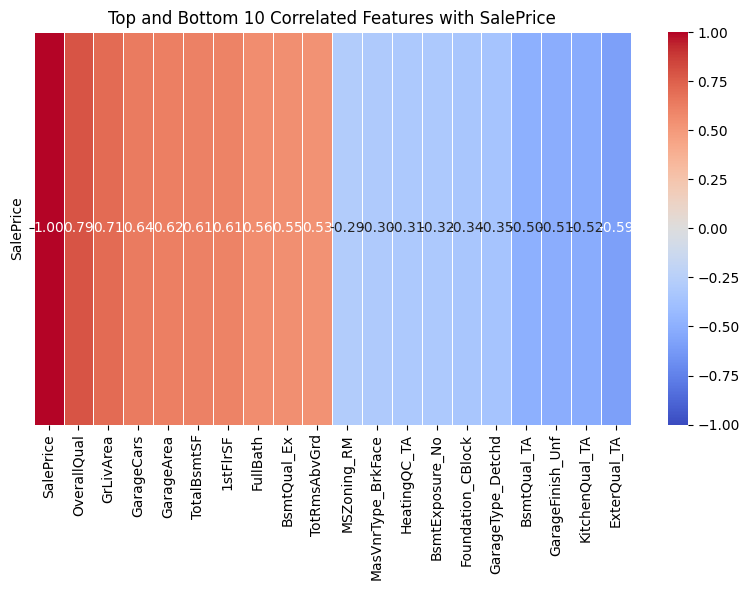

In [7]:
# Question 2.
# Plotting top and bottom 10 features correlated with SalePrice

# Computing the correlation matrix
correlation_matrix = train_df.corr()

# Selecting the correlation of features with the target variable 'SalePrice'
target_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Creating a subset of top and bottom 10 correlated features
top_corr_features = target_correlation.head(10)  # Top 10 positively correlated features
bottom_corr_features = target_correlation.tail(10)  # Bottom 10 negatively correlated features

# Combining top and bottom correlated features for a heatmap
corr_subset = pd.concat([top_corr_features, bottom_corr_features])

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

# Setting the title
plt.title('Top and Bottom 10 Correlated Features with SalePrice')

# Showing the plot
plt.tight_layout()
plt.show()

Based on my analysis, I initially focused on selecting features with a strong positive correlation to the house sale price. These features represent critical attributes, such as the overall quality of construction, the size of the property, and the number of rooms. These are key drivers that tend to increase the sale price of houses.

Additionally, I identified features with a significant negative correlation to the sale price. While these factors may not directly contribute to increasing the value, they are crucial in highlighting conditions or characteristics that can decrease the house’s worth. Including these negatively correlated features enables the model to capture a more comprehensive understanding of the factors affecting house prices.

By incorporating both strongly positively correlated features and significantly negatively correlated ones, the regression model gains the ability to account for both value-enhancing and value-reducing factors. This balanced feature selection strategy improves the model’s accuracy in predicting sale prices by better reflecting the diverse influences on property values.

In [8]:
# Selecting features based on high absolute correlation
selected_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()
print("Selected Features Based on Correlation:\n", selected_features)
selected_features.remove("SalePrice")

# Reducing training and validation data to selected features
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# Question 3.
# initializing and training the model using selected features
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the validation set
y_pred = model.predict(X_val)

# Question 4.
# Evaluatig model performance
r2 = r2_score(y_val, y_pred)
print("\nR-squared:", r2)

Selected Features Based on Correlation:
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']

R-squared: 0.828187953583166


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


**Question 1: Provide a brief description of the PLM you selected, including its original pretraining data sources, number of parameters, and any task-specific fine-tuning if applied.**

RoBERTa (Robustly Optimized BERT), is a transformer-based language model which is a advanced version of BERT and a  Pretraining Approach, by using huge data, bigger batch sizes, and longer training, making it useful for a wide range of natural language tasks. In this task RoBERTa model is used for zero-shot classification of sentiment in user reviews.

Original pretraining data sources:

RoBERTa is pretrained on a large corpus of text, and a transformer-based model. Its pretraining data sources are:
BooksCorpus, OpenWebText, English Wikipedia, CC-News.

Number of Parameters:

Approximately 125 million parameters are there in roberta-base model.

Fine-Tuning:

Since this is a zero-shot classification this it is not fine tuned for this task.

In [9]:
# Write your code here

# question 2: Use the selected PLM to perform the sentiment analysis on the
#data collected in Assignment 3. Only use the model in the zero-shot
#setting, NO finetuning is required. Evaluate performance of the model by
# comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.

import pandas as pd
from transformers import pipeline

# loading the dataset
# data = pd.read_csv('annotated_1000_imdb_reviews.csv')
print(data.head(),"\n")

# zero-shot classification pipeline intialization with RoBERTa
zero_shot_classifier = pipeline("zero-shot-classification", model="roberta-base")

# sentiment classes for the dataset
sentiment_classes = ['positive', 'negative', 'neutral']

# classifier to each review
resulted_sentiments = data['clean_text'].apply(lambda x: zero_shot_classifier(x, candidate_labels=sentiment_classes, hypothesis_template="This text is {}."))

# sentiment predictediction and calculating sentiment scores
data['predicted_sentiment'] = [sentiment['labels'][0] for sentiment in resulted_sentiments]
data['sentiment_score'] = [sentiment['scores'][0] for sentiment in resulted_sentiments]

   document_id                                         clean_text sentiment
0            1  hugh jackman perfect wolverin fun movi like di...  positive
1            2  crazi blast bonker sooo say movi whole team be...  positive
2            3  weve wait long moment beyond fun wholesom full...  positive
3            4  mani easter egg true comic charact may possibl...  positive
4            5  read ign review guy gave stori poorth guy real...  positive 



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [10]:
# resulted dataframe
data.head()

,document_id,clean_text,sentiment,predicted_sentiment,sentiment_score
0,1,hugh jackman perfect wolverin fun movi like di...,positive,positive,0.333631
1,2,crazi blast bonker sooo say movi whole team be...,positive,positive,0.333502
2,3,weve wait long moment beyond fun wholesom full...,positive,neutral,0.334055
3,4,mani easter egg true comic charact may possibl...,positive,positive,0.333459
4,5,read ign review guy gave stori poorth guy real...,positive,positive,0.333410


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculatting metrics using 'weighted' average to account for label imbalance
accuracy = accuracy_score(data['sentiment'], data['predicted_sentiment'])
precision = precision_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
recall = recall_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
f1 = f1_score(data['sentiment'], data['predicted_sentiment'], average='weighted')

print(f"Accuracy: {accuracy}\nWeighted Precision: {precision}\nWeighted Recall: {recall}\nWeighted F1 Score: {f1}")

Accuracy: 0.852
Weighted Precision: 0.8603438520130577
Weighted Recall: 0.852
Weighted F1 Score: 0.8561515971846237


*** Question 3: (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.***

**Advantages:**

RoBERTa offers several advantages, including better performance, as it outperforms BERT on various NLP tasks due to longer training, more data, and larger batch sizes, allowing it to learn more effectively. It also provides task flexibility, as RoBERTa can classify text into predefined categories without needing task-specific fine-tuning, making it adaptable for different NLP tasks. Additionally, RoBERTa has strong generalization, being pretrained on diverse text sources, which helps it generalize well across domains and perform well on unseen tasks.

**Disadvantages:**

RoBERTa has high computational demands due to its large model size, requiring significant resources for both training and inference, which can be resource-intensive. Moreover, performance without fine-tuning for specific tasks may not reach the highest accuracy. Finally, RoBERTa's inefficiency for deployment is another concern, as the large number of parameters makes it slow and less efficient in resource-constrained environments.

**Challenges Encountered**

- **Handling Neutral Sentiments**: One of the key challenges was the difficulty in accurately classifying neutral sentiments. Neutral sentiments often present subtle cues that make them harder to distinguish from either positive or negative sentiments. Additionally, these neutral sentiments are less frequently represented in the training data, which further hindered the model's ability to identify and categorise them.

- **Computational Demands**: The model required significant computational resources to run effectively, particularly for large datasets or complex tasks. This led to increased processing time, especially when dealing with large-scale sentiment analysis.

- **Model Bias**: Another major challenge was the potential for biases in the training data. The data used to train the model is not diverse enough so the model performed poorly on certain types of input. This resulted in skewed or inaccurate sentiment classifications.
